In [1]:
''' Portmap Logistic Regression
    Brihat Ratna Bajracharya
    19/075
    CDCSIT '''

' Portmap Logistic Regression\n    Brihat Ratna Bajracharya\n    19/075\n    CDCSIT '

In [2]:
# IMPORT HERE
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import time

In [28]:
# reading Portmap csv

df = pd.read_csv('Portmap.csv', delimiter=",", low_memory=False)

# df
# print(type(df))

In [29]:
# show dataset
df.head(10)

,Unnamed_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,2.833711e+04,98168.0,3.0,9529897.25,3.515826e+05,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,1.213149e+05,420255.0,4.0,9493929.75,3.515411e+05,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000e+00,62416.0,62416.0,36373056.00,0.000000e+00,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000e+00,62413.0,62413.0,36372291.00,0.000000e+00,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000e+00,62409.0,62409.0,36372216.00,0.000000e+00,36372216.0,36372216.0,0,0,BENIGN
5,0,172.217.9.238-192.168.50.6-80-54805-6,192.168.50.6,54805,172.217.9.238,80,6,2018-11-03 09:18:18.626325,3,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,BENIGN
6,1,172.217.9.238-192.168.50.6-80-54805-6,172.217.9.238,80,192.168.50.6,54805,6,2018-11-03 09:18:18.667379,2,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,1,BENIGN
7,144429,172.217.9.238-192.168.50.6-80-54805-6,192.168.50.6,54805,172.217.9.238,80,6,2018-11-03 09:18:18.667575,2,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,BENIGN
8,224,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,2018-11-03 09:18:18.758942,28870362,5,...,0.000000e+00,2501634.0,2501634.0,8789576.00,2.955921e+06,10912366.0,5413491.0,0,0,BENIGN
9,25,172.16.0.5-192.168.50.4-0-0-0,172.16.0.5,0,192.168.50.4,0,0,2018-11-03 09:18:19.155867,118365715,40,...,3.462641e+06,7515650.0,103.0,9687762.70,5.445120e+06,18391321.0,5118819.0,0,1,Portmap


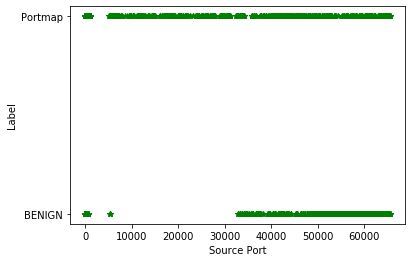

In [5]:
# Plotting Source Port vs Label

source_port = df['Source_Port']
label = df[list(df.columns)[-1]]

plt.plot(source_port, label, 'g*')
plt.xlabel('Source Port')
plt.ylabel('Label')

plt.show()

In [6]:
# encoding non float data to float type for all columns

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

data = handle_non_numerical_data(df)

# print(type(data))

# print(data)

In [30]:
data.head(10)

,Unnamed_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,24,94238,161,0,33,0,0,80260,114456999,45,...,2.833711e+04,98168.0,3.0,9529897.25,3.515826e+05,10001143.0,9048097.0,8,0,0
1,26,39286,137,0,33,0,0,25731,114347504,56,...,1.213149e+05,420255.0,4.0,9493929.75,3.515411e+05,9978130.0,8820294.0,8,0,0
2,176563,177204,67,54799,179,443,6,132519,36435473,6,...,0.000000e+00,62416.0,62416.0,36373056.00,0.000000e+00,36373056.0,36373056.0,8,0,0
3,50762,156514,67,54800,10,443,6,150107,36434705,6,...,0.000000e+00,62413.0,62413.0,36372291.00,0.000000e+00,36372291.0,36372291.0,8,0,0
4,87149,132848,67,54801,179,443,6,23012,36434626,6,...,0.000000e+00,62409.0,62409.0,36372216.00,0.000000e+00,36372216.0,36372216.0,8,0,0
5,0,187888,67,54805,163,80,6,82928,3,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,8,0,0
6,1,187888,141,80,78,54805,6,185496,2,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,8,1,0
7,144429,187888,67,54805,163,80,6,113771,2,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,8,0,0
8,224,146542,154,68,176,67,17,134822,28870362,5,...,0.000000e+00,2501634.0,2501634.0,8789576.00,2.955921e+06,10912366.0,5413491.0,8,0,0
9,25,42694,202,0,68,0,0,23065,118365715,40,...,3.462641e+06,7515650.0,103.0,9687762.70,5.445120e+06,18391321.0,5118819.0,8,1,1


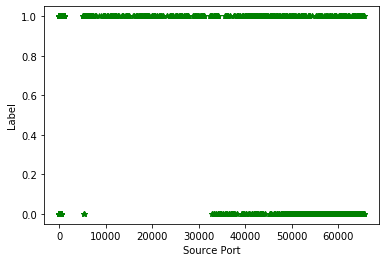

In [7]:
# Plotting Average Packet Size vs Label after encoding

source_port = df['Source_Port']
label = df[list(df.columns)[-1]]

plt.plot(source_port, label, 'g*')
plt.xlabel('Source Port')
plt.ylabel('Label')

plt.show()

In [8]:
# correlation test among feature columns with label column

corr = data.corr()
print(corr['Label'])

labelcorr = corr['Label'].sort_values()
corr_dict = dict(labelcorr)

Unnamed_0         0.116757
Flow_ID          -0.002661
Source_IP         0.866048
Source_Port      -0.818905
Destination_IP   -0.543441
                    ...   
Idle_Max         -0.304278
Idle_Min         -0.291854
SimillarHTTP     -0.135563
Inbound           0.860093
Label             1.000000
Name: Label, Length: 88, dtype: float64


In [9]:
# choose highly correlated column among all columns
feature_dict = dict((k, v) for k, v in corr_dict.items() if np.absolute(v) > 0.7)
print(feature_dict)

{'Source_Port': -0.8189050406122815, 'Protocol': 0.705635574606102, 'Fwd_Packet_Length_Min': 0.7291026803636192, 'Min_Packet_Length': 0.7291679201346289, 'Inbound': 0.8600933612454168, 'Source_IP': 0.8660476930033244, 'Label': 1.0}


In [32]:
# less correlated features

feature_dict_2 = dict((k, np.absolute(v)) for k, v in corr_dict.items() if np.absolute(v) < 0.7)
print(feature_dict_2)

{'Down_Up_Ratio': 0.6485234774068003, 'URG_Flag_Count': 0.6150806663811492, 'Bwd_Packet_Length_Min': 0.5505265792832202, 'Destination_IP': 0.5434405331523054, 'CWE_Flag_Count': 0.4208864290747812, 'Avg_Bwd_Segment_Size': 0.41915492520184805, 'Bwd_Packet_Length_Mean': 0.41915492520184805, 'Packet_Length_Std': 0.4075714394179601, 'Bwd_Packet_Length_Max': 0.3767449968071271, 'Fwd_PSH_Flags': 0.37267372771571006, 'RST_Flag_Count': 0.37267372771571006, 'Bwd_IAT_Min': 0.36001741149437744, 'ACK_Flag_Count': 0.35110192156829223, 'Init_Win_bytes_forward': 0.3427212832233071, 'Flow_Duration': 0.34251354056570205, 'Bwd_Packet_Length_Std': 0.33486557557107943, 'Fwd_IAT_Total': 0.3345362968706236, 'Fwd_Packet_Length_Std': 0.3249704959212946, 'Flow_IAT_Max': 0.31737739522397307, 'Bwd_IAT_Total': 0.30819903400370086, 'Fwd_IAT_Max': 0.30686078036235936, 'Idle_Max': 0.30427789076729145, '_Flow_IAT_Std': 0.30420728654746226, 'Idle_Mean': 0.30129163476858123, 'Fwd_IAT_Std': 0.300181473639723, 'Packet_Len

In [10]:
# omit last label column
selected_columns = list(feature_dict)[:-1]
print(selected_columns)

['Source_Port', 'Protocol', 'Fwd_Packet_Length_Min', 'Min_Packet_Length', 'Inbound', 'Source_IP']


In [11]:
# split encoded dataset into train and test 4:1

X = data[selected_columns]
# print(X)
y = data[list(data.columns)[-1]]
# print(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [34]:
# logistic regression analysis

start = time.time()

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="lbfgs", max_iter=200)

# fit the model with data
logreg.fit(X_train,y_train)

# predict y using logreg trained model
y_pred=logreg.predict(X_test)

end = time.time()
print(end - start)

5.286838531494141


In [35]:
logreg.coef_

array([[ 4.33900711e-05, -2.99593956e-01,  1.72514182e-02,
         4.17837897e-02,  4.80593397e+00,  1.08555476e-02]])

In [36]:
# calculate confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  936,     5],
       [   27, 37371]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

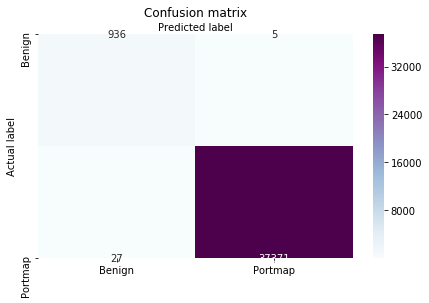

In [38]:
# plot confusion matrix for Portmap
fig, ax = plt.subplots()

# create heatmap
x_axis_labels = ['Benign','Portmap'] # labels for x-axis
y_axis_labels = ['Benign','Portmap'] # labels for y-axis
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu", fmt='g')

ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
# calculate and print performance metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average="macro"))
print("Recall:",metrics.recall_score(y_test, y_pred,average="macro"))
print("F1 Score:",metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy: 0.9991653407757114
Precision: 0.9859144205687491
Recall: 0.9969822699890354
F1 Score: 0.9913826605347251


In [17]:
''' COMPLETE '''

' COMPLETE '

In [18]:
# without feature selection (split data set 4:1)

X_wo = data[list(data.columns)[:-1]]
# print(X_wo)
y_wo = data[list(data.columns)[-1]]
# print(y_wo)
X_train_wo,X_test_wo,y_train_wo,y_test_wo=train_test_split(X_wo,y_wo,test_size=0.2,random_state=0)

In [19]:
# without feature selection (logistic regression wo)
start_wo = time.time()

logreg_wo = LogisticRegression(solver="lbfgs", max_iter=5000)

# fit the model with data
logreg_wo.fit(X_train_wo,y_train_wo)

# predict y using logreg trained model
y_pred_wo=logreg_wo.predict(X_test_wo)

end_wo = time.time()
print(end_wo - start_wo)

295.805459022522


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [20]:
# calculate confusion matrix wo

cnf_matrix_wo = metrics.confusion_matrix(y_test_wo, y_pred_wo)
cnf_matrix_wo

array([[  902,    39],
       [   31, 37367]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

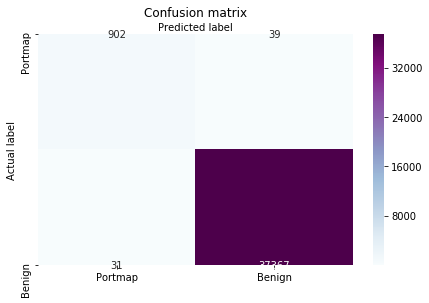

In [21]:
# plot confusion matrix wo

fig, ax = plt.subplots()

# create heatmap
x_axis_labels = ['Portmap','Benign'] # labels for x-axis
y_axis_labels = ['Portmap','Benign'] # labels for y-axis

sns.heatmap(pd.DataFrame(cnf_matrix_wo), annot=True, cmap="BuPu", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
# calculate performance metrics wo

print("Accuracy:",metrics.accuracy_score(y_test_wo, y_pred_wo))
print("Precision:",metrics.precision_score(y_test_wo, y_pred_wo,average="micro"))
print("Recall:",metrics.recall_score(y_test_wo, y_pred_wo,average="micro"))
print("F1 Score:",metrics.f1_score(y_test_wo, y_pred_wo,average="micro"))

Accuracy: 0.9981741829468688
Precision: 0.9981741829468688
Recall: 0.9981741829468688
F1 Score: 0.9981741829468688


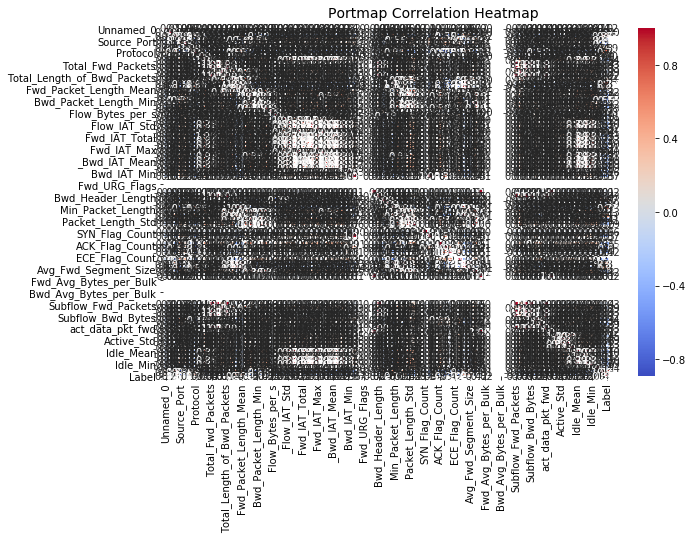

In [23]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Portmap Correlation Heatmap', fontsize=14)